In [4]:
!pip install astroquery



Defaulting to user installation because normal site-packages is not writeable
  Using cached astroquery-0.4.11-py3-none-any.whl.metadata (6.5 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached keyring-25.6.0-py3-none-any.whl.metadata (20 kB)
  Using cached pyvo-1.7-py3-none-any.whl.metadata (4.7 kB)
  Using cached pywin32_ctypes-0.2.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached jaraco.classes-3.4.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached jaraco_functools-4.3.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached jaraco.context-6.0.1-py3-none-any.whl.metadata (4.1 kB)
  Using cached more_itertools-10.8.0-py3-none-any.whl.metadata (39 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.1 MB 10.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 19.1 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import matplotlib.pyplot as plt



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start(

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



ImportError: numpy.core.multiarray failed to import

In [10]:
from astroquery.skyview import SkyView
import numpy as np
import matplotlib.pyplot as plt

In [11]:
hdu=SkyView.get_images("M31","SDSSg")[0][0]
# hdu will have header(meta data), when was img taken, telescope used etc as well as data, a 2D numpy array of pixel intensities
# it retuns fits images, and ecah image contains a header and data
# that data is a 2d numpy array and each value represents flux, ie. light energy cmg from that region in sky to telescope

In [12]:
hdu.header

SIMPLE  =                    T / Written by SkyView Sun Oct 12 15:29:47 EDT 2025
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [13]:
M31_pixels=hdu.data
M31_pixels

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [5]:
M31_pixels.shape

(300, 300)

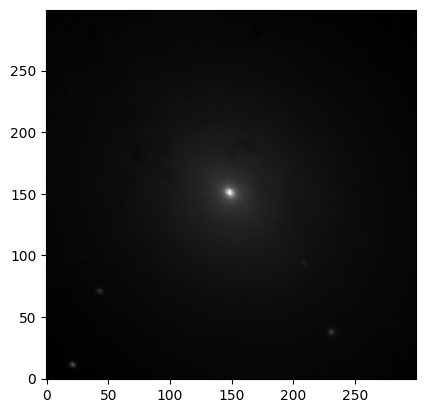

In [6]:
plt.imshow(M31_pixels,cmap='grey',origin='lower') # imshow-> array to image

In [7]:

import astropy.units as u

In [8]:
DSS2_blue1=SkyView.get_images("M31","DSS2 Blue",pixels=300,radius=150*u.arcmin)[0][0]  # detected in blue band of DSS2
DSS2_blue2=SkyView.get_images("M31","DSS2 Blue", pixels=600,radius=150*u.arcmin)[0][0]
DSS2_blue3=SkyView.get_images("M31","DSS2 Blue",pixels=600,radius=200*u.arcmin)[0][0]
DSS2_blue4=SkyView.get_images("M31","DSS2 Blue",pixels=600,radius=100*u.arcmin)[0][0]


In [10]:
DSS2_blue1.data

array([[ 9036.,  8725.,  8363., ...,  9172.,  8721.,  8623.],
       [ 9278.,  9543.,  9606., ...,  8793.,  8876.,  8412.],
       [ 9365.,  9175.,  9365., ...,  8760.,  9829.,  8741.],
       ...,
       [ 9598.,  9228.,  9605., ...,  9729.,  9386.,  9144.],
       [ 9836.,  9868., 10218., ...,  9814.,  9806.,  9726.],
       [ 9487.,  9646., 18865., ...,  9379.,  9533.,  9573.]], dtype='>f4')

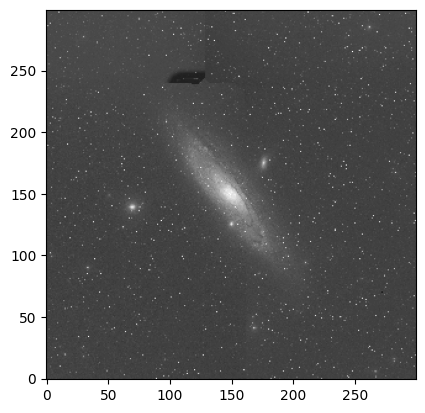

In [11]:
plt.imshow(DSS2_blue1.data,cmap='grey',origin='lower')

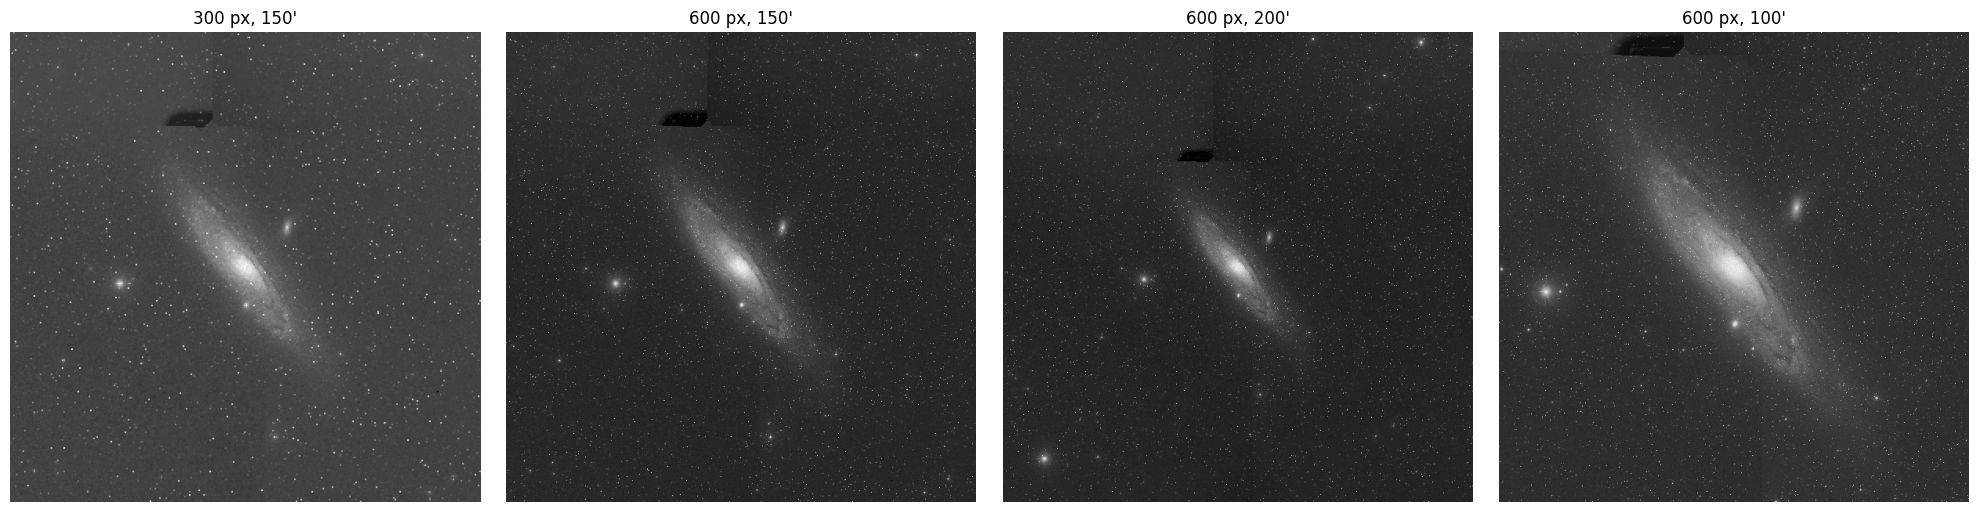

In [12]:
# Your four images
images = [DSS2_blue1, DSS2_blue2, DSS2_blue3, DSS2_blue4]
titles = [
    "300 px, 150'",
    "600 px, 150'",
    "600 px, 200'",
    "600 px, 100'"
]

# Create a figure with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img.data, origin='lower', cmap='gray')
    ax.set_title(title)
    ax.axis('off')  # hide axes for cleaner look

plt.tight_layout()
plt.show()

In [ ]:
# pixel scale (arcmin/pixel)=field of view/ no of pixels, so for same pixel size, the less the radius, higher will be the resolution. more detail/pixel
#similarly, for same radius, more the number of pixels, better the resolution

In [ ]:
#hdu->header/data unit
#primary hdu-> main or mandatory hdu in every fits file, there can be more hdus containing extension hdu 

In [ ]:
#CREATING OWN FITS FILE

In [13]:
hdu=SkyView.get_images("M31","SDSSg")[0][0]
hdu.header

SIMPLE  =                    T / Written by SkyView Sun Oct 12 15:29:47 EDT 2025
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [14]:
hdu.data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [15]:
hdu

In [16]:
from astropy.io import fits

In [ ]:
#its possible to have multiple hdus,will be stored in hdulsit

In [17]:
hdulist=fits.HDUList()
hduPrimary=fits.PrimaryHDU() #creates primaryHDU
hduPrimary.data=hdu.data # assigns its data
hduPrimary.header=hdu.header #assigns it header
hdulist.append(hduPrimary) #appends to list of hdus
hdulist

In [ ]:
#Adding other hdus as well apart from primaryhdu

In [18]:
ext_data=np.random.random((50,50))
extHDU=fits.ImageHDU()
extHDU.data=ext_data
extHDU.header['BAND']='Infrared'
extHDU.header['COMMENT']='extension header details'
hdulist.append(extHDU)

In [19]:
hdulist

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000016A5FD43170>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000016A5E71C710>]

In [20]:
hdulist.writeto('Dummy_fits_file.fits',overwrite=True) # save fits file to disk

In [21]:
my_fits=fits.open('Dummy_fits_file.fits',mode='update')
my_fits

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000016A5E724E00>, <astropy.io.fits.hdu.image.ImageHDU object at 0x0000016A5E724230>]

In [13]:
my_fits[0]

In [14]:
my_fits[0].data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [15]:
my_fits[0].header

SIMPLE  =                    T / Written by SkyView Sun Oct 12 15:29:47 EDT 2025
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

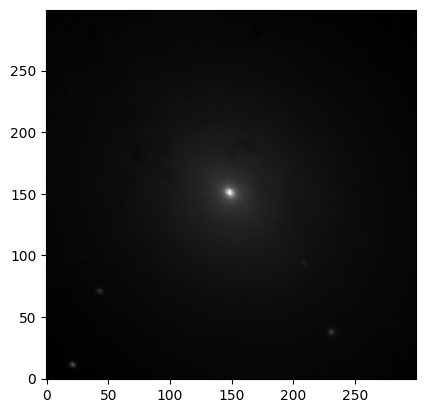

In [38]:
plt.imshow(hdu.data,cmap='grey',origin='lower')

In [22]:
my_fits[1]

In [23]:
my_fits[1].data

array([[0.58940792, 0.75546464, 0.92758114, ..., 0.38860567, 0.4867932 ,
        0.07837048],
       [0.15866714, 0.85333922, 0.68914615, ..., 0.77460268, 0.13385411,
        0.4585382 ],
       [0.98025623, 0.27479162, 0.15098949, ..., 0.92643942, 0.0419144 ,
        0.57618343],
       ...,
       [0.5056596 , 0.95176446, 0.19010595, ..., 0.82477762, 0.7199982 ,
        0.86639073],
       [0.0946384 , 0.22527132, 0.7957358 , ..., 0.25309154, 0.96049719,
        0.34280434],
       [0.38005714, 0.85131464, 0.31766031, ..., 0.73117389, 0.21218568,
        0.39558697]], dtype='>f8')

In [24]:
my_fits[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   50                                                  
NAXIS2  =                   50                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
BAND    = 'Infrared'                                                            
COMMENT extension header details                                                

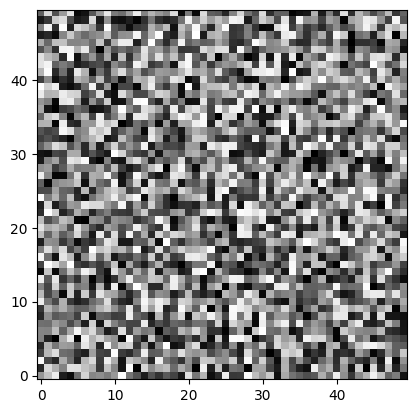

In [25]:
plt.imshow(my_fits[1].data,cmap='grey',origin='lower')  # since was assigned random values

In [26]:
print('Summary statistics')
print(f'Minimum:- {np.min(hdu.data)}')
print(f'Maximum:- {np.max(hdu.data)}')
print(f'Average:- {np.mean(hdu.data)}')
print(f'Std:- {np.std(hdu.data)}')

Summary statistics
Minimum:- 5.359375
Maximum:- 178.0
Average:- 13.329444885253906
Std:- 6.3922271728515625


(array([3.0250e+03, 1.0787e+04, 2.0618e+04, 1.6363e+04, 1.1202e+04,
        7.4240e+03, 5.4950e+03, 3.8600e+03, 2.7730e+03, 2.0410e+03,
        1.6910e+03, 1.1580e+03, 8.8600e+02, 6.2700e+02, 4.5800e+02,
        3.5800e+02, 2.6800e+02, 1.9400e+02, 1.6700e+02, 1.1500e+02,
        8.5000e+01, 6.3000e+01, 5.5000e+01, 3.6000e+01, 3.4000e+01,
        2.2000e+01, 1.8000e+01, 2.0000e+01, 1.8000e+01, 7.0000e+00,
        1.6000e+01, 7.0000e+00, 1.0000e+01, 5.0000e+00, 7.0000e+00,
        7.0000e+00, 4.0000e+00, 5.0000e+00, 7.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        0.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

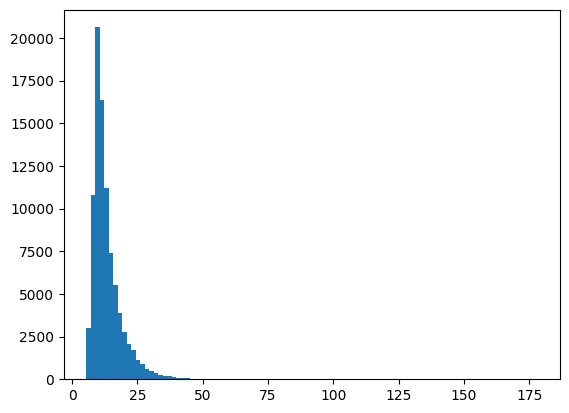

In [28]:
plt.hist(hdu.data.flat,bins=100)

In [29]:
hdu.data[150,150] # extreme center of galaxy, got from the header

np.float32(148.5)

In [ ]:
#PIXEL SCALING

In [ ]:
#MinMax scaling

In [45]:
hdu.data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.4609375, 7.515625 ,
        7.4140625],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.625    , 7.4453125,
        7.4453125],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.4375   , 7.5625   ,
        7.46875  ],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype='>f4')

In [30]:
def minmax_scaling(pixel_array):    # x-xmin/xmax-xmin
    num=pixel_array-np.min(pixel_array)
    den=np.max(pixel_array)-np.min(pixel_array)
    return num/den

In [31]:
minmax_scaled_array=minmax_scaling(hdu.data)
minmax_scaled_array

array([[0.00049778, 0.00054304, 0.00049778, ..., 0.01217305, 0.01248982,
        0.01190153],
       [0.00045253, 0.00054304, 0.00036202, ..., 0.01312336, 0.01208254,
        0.01208254],
       [0.00067879, 0.        , 0.00058829, ..., 0.01203729, 0.01276134,
        0.0122183 ],
       ...,
       [0.01181102, 0.01181102, 0.01267083, ..., 0.00099557, 0.00181012,
        0.0023079 ],
       [0.0122183 , 0.01307811, 0.01289709, ..., 0.00176487, 0.00181012,
        0.00117658],
       [0.01258032, 0.01244457, 0.01289709, ..., 0.00099557, 0.00135759,
        0.00113132]], dtype=float32)

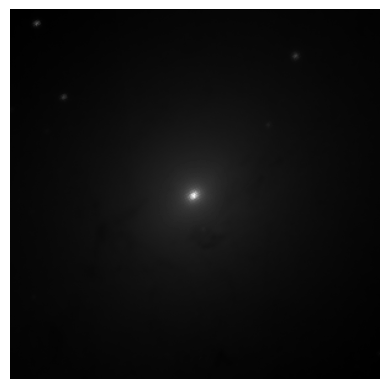

In [32]:
plt.imshow(minmax_scaled_array,cmap='grey')
plt.axis('off')
plt.show()

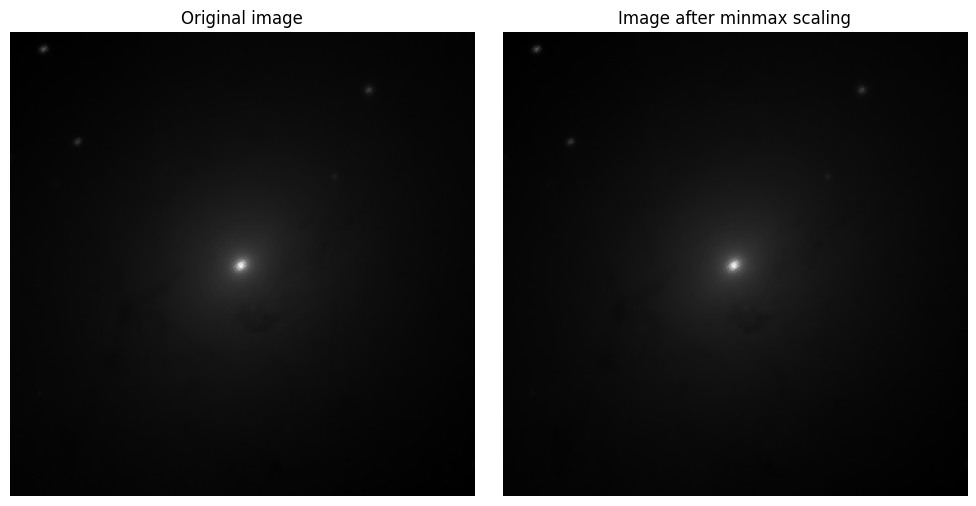

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First plot
axes[0].imshow(hdu.data, cmap='gray')
axes[0].axis('off')  
axes[0].set_title('Original image')

# Second plot
axes[1].imshow(minmax_scaled_array, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Image after minmax scaling')

plt.tight_layout()  
plt.show()

In [ ]:
# minmax scaling didnt help much

In [ ]:
#Standard scaling

In [34]:
def z_scaled(pixel_array):  # x-mean/std
    num=pixel_array-np.mean(pixel_array)
    den=np.std(pixel_array)
    return num/den

In [35]:
z_scaled_array=z_scaled(hdu.data)

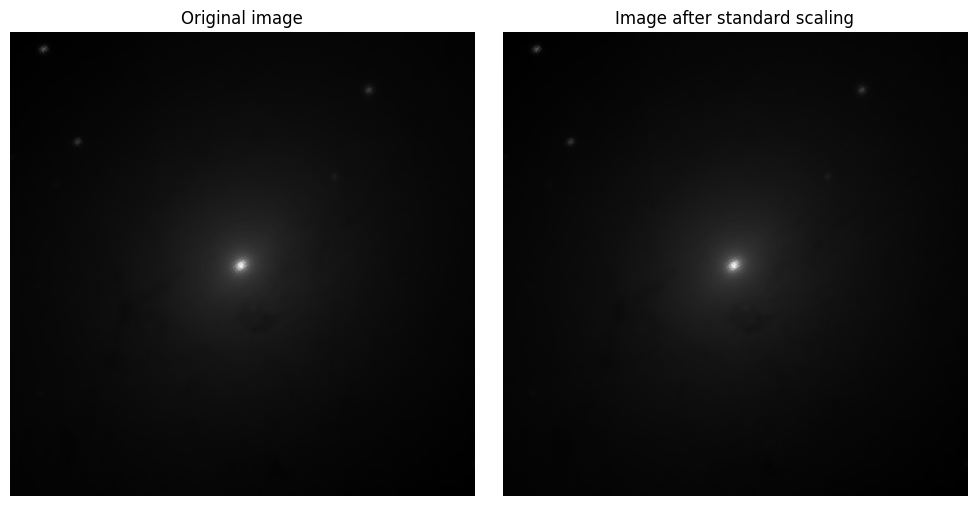

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First plot
axes[0].imshow(hdu.data, cmap='gray')
axes[0].axis('off')  
axes[0].set_title('Original image')

# Second plot
axes[1].imshow(z_scaled_array, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Image after standard scaling')

plt.tight_layout()  
plt.show()

In [ ]:
# standarad scaling didnt help much

In [ ]:
#LOG normalization pixel scaling

In [20]:
def logScaling(pixel_array):
    return np.log(pixel_array)

In [21]:
logScaled_array=logScaling(hdu.data)

In [22]:
logScaled_array

array([[1.6947552, 1.6961888, 1.6947552, ..., 2.009681 , 2.0169842,
        2.0033786],
       [1.6933194, 1.6961888, 1.6904417, ..., 2.0314324, 2.0075846,
        2.0075846],
       [1.7004776, 1.6788473, 1.6976205, ..., 2.0065348, 2.023202 ,
        2.0107276],
       ...,
       [2.0012689, 2.0012689, 2.0211337, ..., 1.7104138, 1.7355198,
        1.7505577],
       [2.0107276, 2.0304072, 2.0262961, ..., 1.7341413, 1.7355198,
        1.7160476],
       [2.019061 , 2.0159442, 2.0262961, ..., 1.7104138, 1.7216499,
        1.7146422]], dtype=float32)

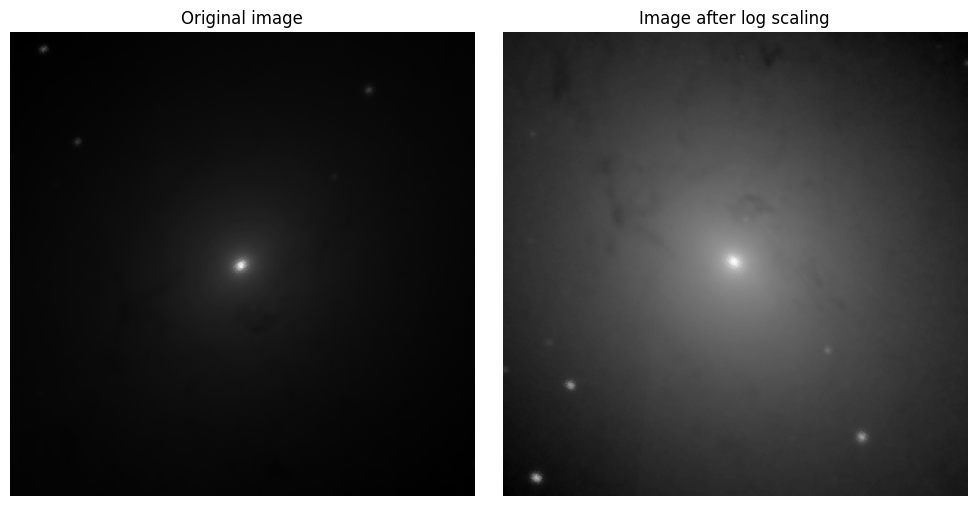

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First plot
axes[0].imshow(hdu.data, cmap='gray')
axes[0].axis('off')  
axes[0].set_title('Original image')

# Second plot
axes[1].imshow(logScaled_array, cmap='gray',origin='lower')
axes[1].axis('off')
axes[1].set_title('Image after log scaling')

plt.tight_layout()  
plt.show()

In [ ]:
# Log scaling gave better results

In [ ]:
#zScaled Interval pixel scaling

In [23]:
from astropy.visualization import ZScaleInterval

In [24]:
z=ZScaleInterval()  # consider an array of numebrs from 1 to 10, u set limit as 3 and 8, so all numbers less than 3 will be converted to 3 and numbers greater than 8 are converted to 8
z1,z2=z.get_limits(logScaled_array)

In [43]:
print(f'Minimum allowed:{z1}')
print(f'Maximum allowed:{z2}')

Minimum allowed:1.6889997720718384
Maximum allowed:4.447910199027215


In [21]:
print(f'Minimum value in array:{np.min(logScaled_array)}')
print(f'Maximum value in array:{np.max(logScaled_array)}')

Minimum value in array:1.678847312927246
Maximum value in array:5.181783676147461


In [ ]:
# all the values greater than 4.44... will be scaled to this value and values less than 1.68... will be scaled to this value

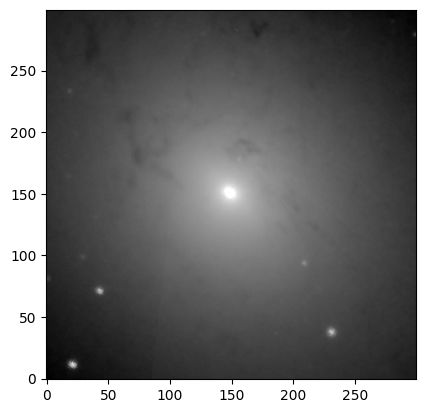

In [25]:
img=plt.imshow(logScaled_array,vmin=z1,vmax=z2,cmap='grey',origin='lower') # all values less than z1, mapped to z1 and all values greater than z2 are mapepd to z2

In [47]:
img  # while dng plt.imshow(), matplotlib maps your pixel values to color, giving them r g b vlaues /grey scale.
# | Thing                           | Original `logScaled_array` | After `make_image()`               |
# | ------------------------------- | -------------------------- | ---------------------------------- |
# | Values                          | Floats like 1, 5, 9        | Integers 0–255 representing colors |
# | Shape                           | 2D `(H, W)`                | 3D `(H, W, 4)` (RGBA)              |
# | Meaning                         | Actual data                | Colors for display                 |
# | Can you get original data back? | ✅ Yes                      | ❌ No                               |


In [26]:
img_array=img.make_image(renderer=None,unsampled=True)[0]

In [27]:
img_array

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 29,  29,  29, 255],
        [ 30,  30,  30, 255],
        [ 29,  29,  29, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 31,  31,  31, 255],
        [ 29,  29,  29, 255],
        [ 29,  29,  29, 255]],

       [[  1,   1,   1, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [ 29,  29,  29, 255],
        [ 31,  31,  31, 255],
        [ 29,  29,  29, 255]],

       ...,

       [[ 28,  28,  28, 255],
        [ 28,  28,  28, 255],
        [ 30,  30,  30, 255],
        ...,
        [  1,   1,   1, 255],
        [  4,   4,   4, 255],
        [  5,   5,   5, 255]],

       [[ 29,  29,  29, 255],
        [ 31,  31,  31, 255],
        [ 31,  31,  31, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  2,   2,   2, 255]],

       [[ 30

In [50]:
img_array.shape  # RGBA

(300, 300, 4)

In [ ]:
#for visualization, we need color values per pixel, they cant show floating point valeus like in logScaled array.
#We have to convert this 4 channel image into grayscale

In [41]:
!pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import cv2
gray_scale=cv2.cvtColor(img_array,cv2.COLOR_RGBA2GRAY)
gray_scale.shape

(300, 300)

Text(0.5, 1.0, 'ZScaled grayscaleimg')

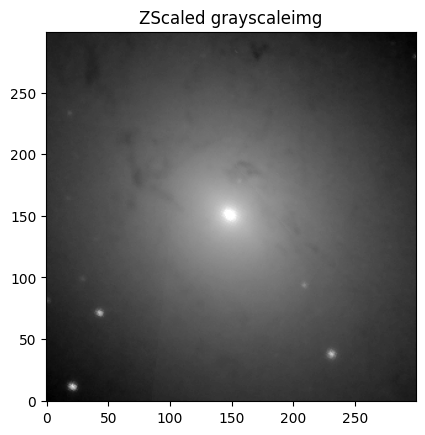

In [52]:
plt.imshow(gray_scale,cmap='grey',origin='lower')
plt.title('ZScaled grayscaleimg')


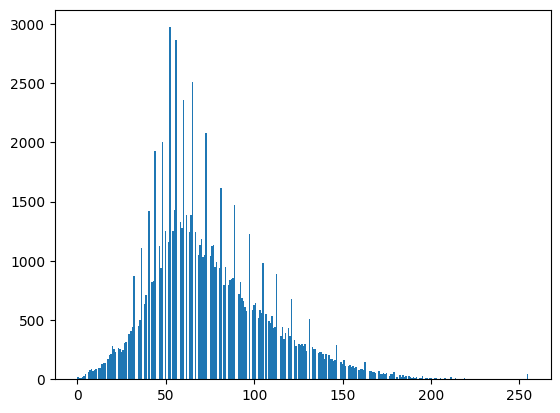

In [53]:
plt.hist(gray_scale.flat,bins=300)
plt.show()  # values form 0 to 255

In [54]:
gray_scale  # we first had pixel intensitiy valu array, now we got color values/pixel

array([[ 0,  0,  0, ..., 29, 30, 29],
       [ 0,  0,  0, ..., 31, 29, 29],
       [ 1,  0,  0, ..., 29, 31, 29],
       ...,
       [28, 28, 30, ...,  1,  4,  5],
       [29, 31, 31, ...,  4,  4,  2],
       [30, 30, 31, ...,  1,  3,  2]], dtype=uint8)

In [51]:
np.min(gray_scale)

0

In [52]:
np.max(gray_scale)

255

In [ ]:
## Image filtering, denoising using gaussian smoothing

In [1]:
from scipy.signal import convolve2d

In [3]:
import numpy as np

In [6]:
kernel=np.ones((3,3))/9

In [7]:
gaussian_kernel=np.array([[1/16,1/8,1/16],
                          [1/8,1/4,1/8],
                          [1/16,1/8,1/16]])

In [8]:
gaussian_kernel

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [17]:
convolved_image=convolve2d(M31_pixels,kernel,mode='same')  # mode sam emeans output size=input size=> padding add


In [18]:
convolved_imageGaussian=convolve2d(M31_pixels,gaussian_kernel,mode='same')  # mode sam emeans output size=input size=> padding add


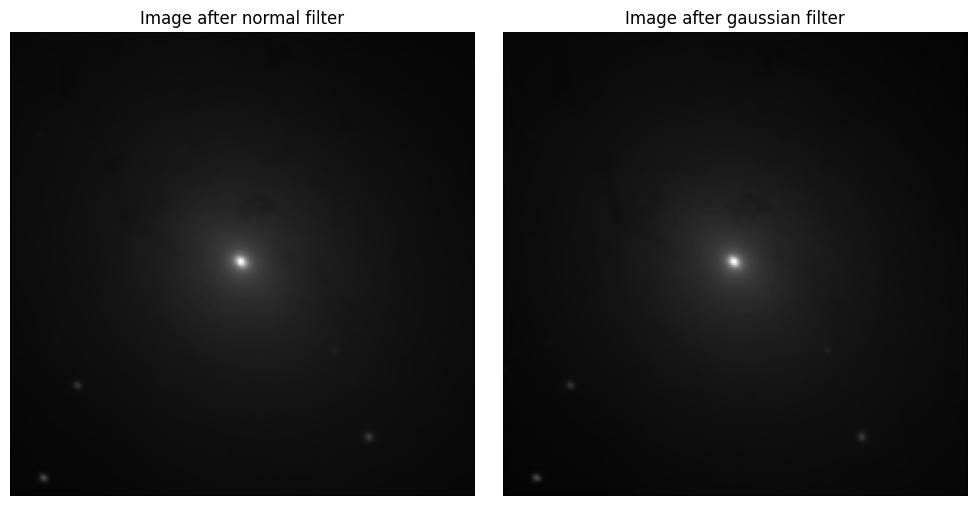

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First plot
axes[0].imshow(convolved_image, cmap='gray',origin='lower')
axes[0].axis('off')  
axes[0].set_title('Image after normal filter')

# Second plot
axes[1].imshow(convolved_imageGaussian, cmap='gray',origin='lower')
axes[1].axis('off')
axes[1].set_title('Image after gaussian filter')

plt.tight_layout()  
plt.show()

In [29]:
ZScaled_img_convolved=convolve2d(gray_scale,kernel,mode='same')

In [30]:
ZScaled_img_convolvedGaussian=convolve2d(gray_scale,gaussian_kernel,mode='same')

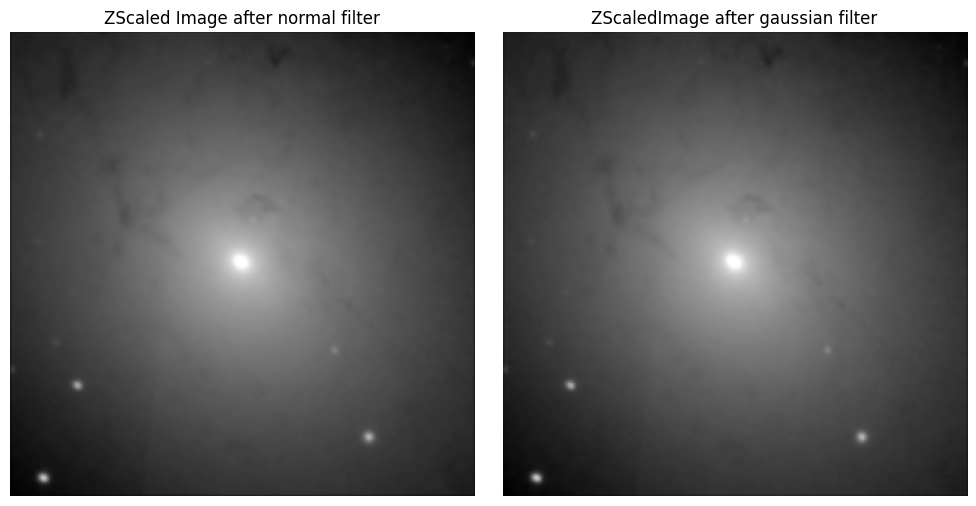

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First plot
axes[0].imshow(ZScaled_img_convolved, cmap='gray',origin='lower')
axes[0].axis('off')  
axes[0].set_title('ZScaled Image after normal filter')

# Second plot
axes[1].imshow(ZScaled_img_convolvedGaussian, cmap='gray',origin='lower')
axes[1].axis('off')
axes[1].set_title('ZScaledImage after gaussian filter')

plt.tight_layout()  
plt.show()

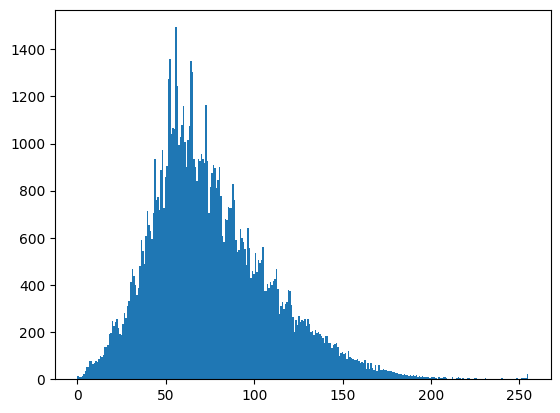

In [33]:
plt.hist(ZScaled_img_convolvedGaussian.flat,bins=300)
plt.show()

In [ ]:
#Enhancing features on M31

In [34]:
SPECTRAL_LIST=['grey','jet','hot','prism','nipy_spectral']

In [36]:
from skimage.filters import meijering,sato

In [39]:
meigering_output=meijering(ZScaled_img_convolvedGaussian)  # arrays only
sato_output=sato(ZScaled_img_convolvedGaussian)

In [40]:
meigering_output

array([[0.11032801, 0.3145153 , 0.50472298, ..., 0.13939629, 0.08903972,
        0.03536822],
       [0.12221563, 0.32594384, 0.51586408, ..., 0.15434169, 0.10439292,
        0.07792507],
       [0.1332461 , 0.33621314, 0.52614468, ..., 0.16843529, 0.1378492 ,
        0.11998615],
       ...,
       [0.08196498, 0.09388164, 0.11118949, ..., 0.18904794, 0.17830376,
        0.16656928],
       [0.05342406, 0.06915118, 0.09944221, ..., 0.13290748, 0.1181443 ,
        0.10579305],
       [0.02346464, 0.05713216, 0.0885759 , ..., 0.09926209, 0.06693074,
        0.04018687]])

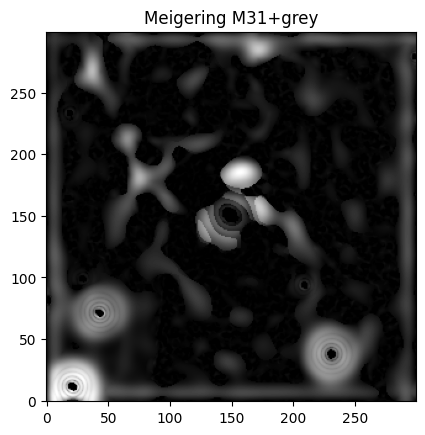

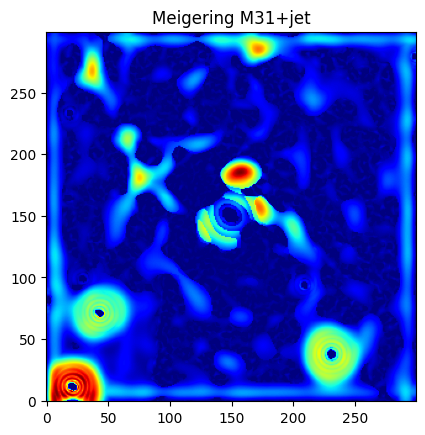

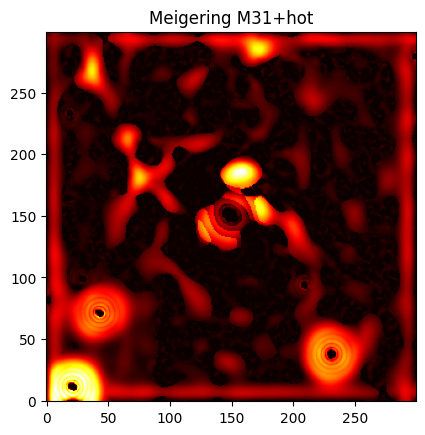

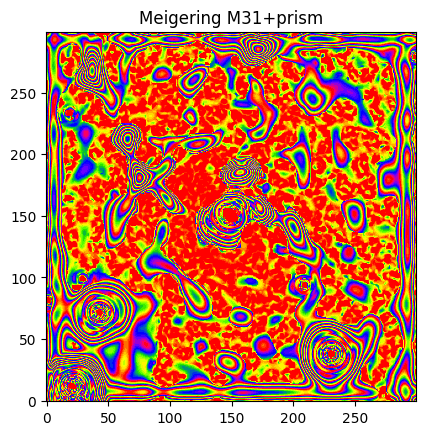

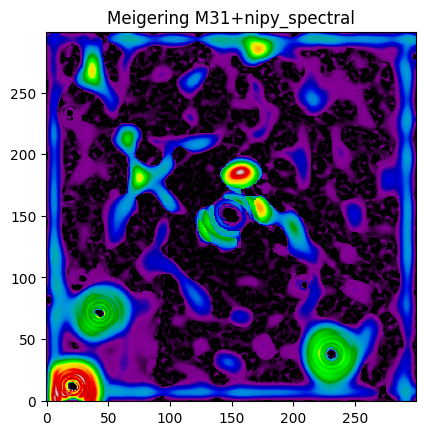

In [43]:
for colormap in SPECTRAL_LIST:
    plt.figure() # create new figure each time
    plt.imshow(meigering_output,cmap=colormap,origin='lower')
    plt.title(f'Meigering M31+{colormap}')
    plt.show()

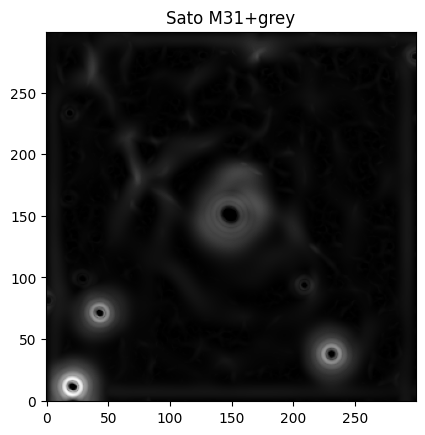

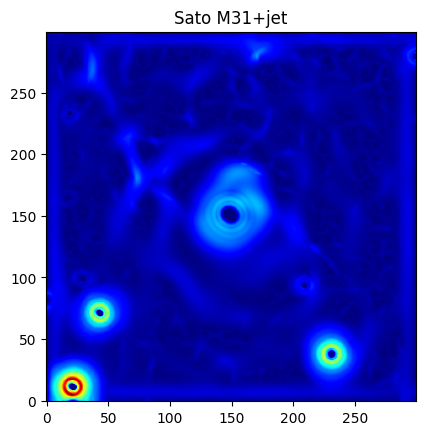

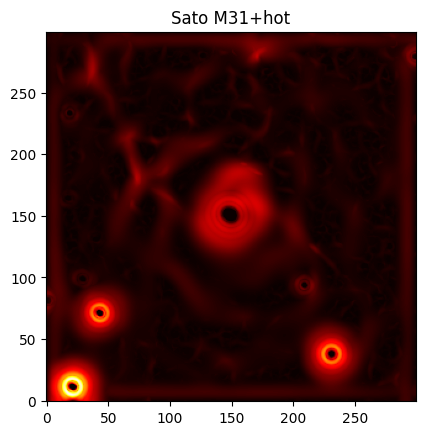

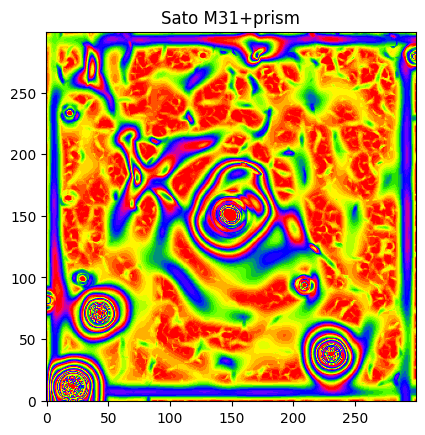

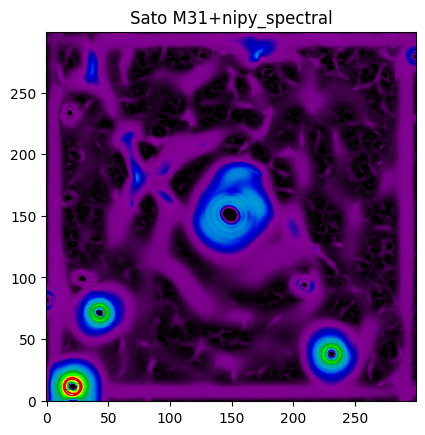

In [44]:
for colormap in SPECTRAL_LIST:
    plt.figure() # create new figure each time
    plt.imshow(sato_output,cmap=colormap,origin='lower')
    plt.title(f'Sato M31+{colormap}')
    plt.show()

In [45]:
from skimage.feature import corner_foerstner

In [46]:
feature_output=corner_foerstner(convolved_imageGaussian)

In [47]:
len(feature_output)

2

In [48]:
feature_output[0]

array([[30.09203518, 33.00073232, 11.93550888, ..., 23.04092336,
        62.65684208, 56.8474414 ],
       [33.05524155, 42.75162886, 19.34213688, ..., 36.8116048 ,
        80.98199836, 62.61910441],
       [12.00236869, 19.39520146, 15.09675252, ..., 28.26789986,
        36.75531336, 22.96800719],
       ...,
       [22.69642525, 36.99451779, 29.05244733, ..., 16.14558114,
        20.93797948, 12.99352509],
       [63.04802582, 82.12578818, 37.65125645, ..., 20.68015163,
        45.7605372 , 35.33173348],
       [57.6451557 , 63.67221568, 23.43646837, ..., 12.78361468,
        35.21726528, 32.02133998]])

In [50]:
feature_output[1]

array([[0.71948362, 0.65861077, 0.24002268, ..., 0.24705631, 0.66070026,
        0.71706862],
       [0.66187938, 0.90714764, 0.53812917, ..., 0.54723033, 0.90837891,
        0.66157207],
       [0.24397018, 0.54442343, 0.97752632, ..., 0.98475223, 0.54850955,
        0.24754228],
       ...,
       [0.2384406 , 0.53664715, 0.97942553, ..., 0.97776215, 0.54476919,
        0.24411783],
       [0.65651741, 0.9069614 , 0.54954553, ..., 0.53906527, 0.90350669,
        0.65701967],
       [0.71906274, 0.66361321, 0.24784965, ..., 0.24136529, 0.65656402,
        0.71434391]])

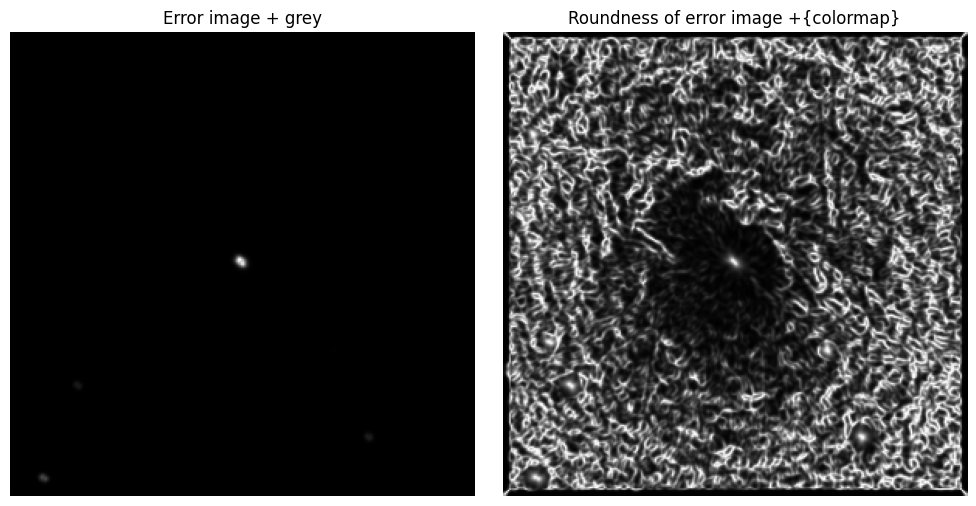

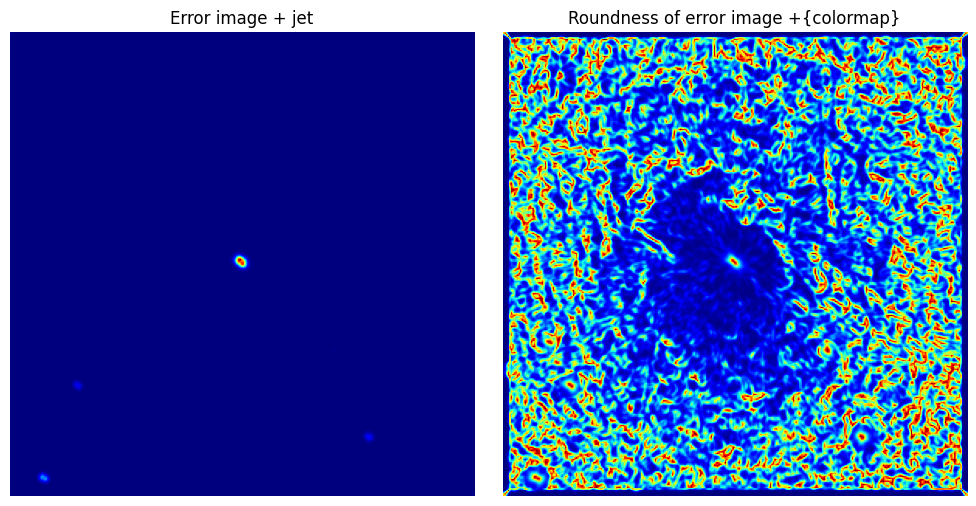

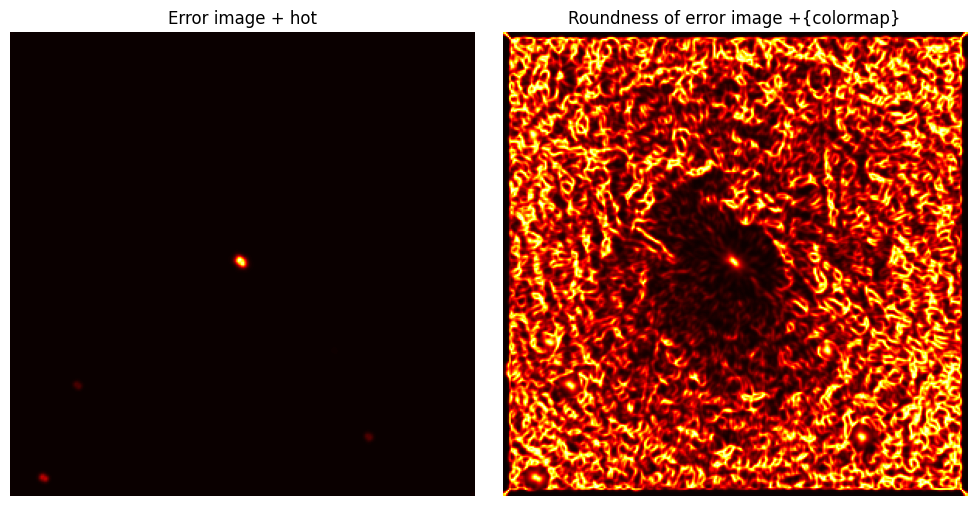

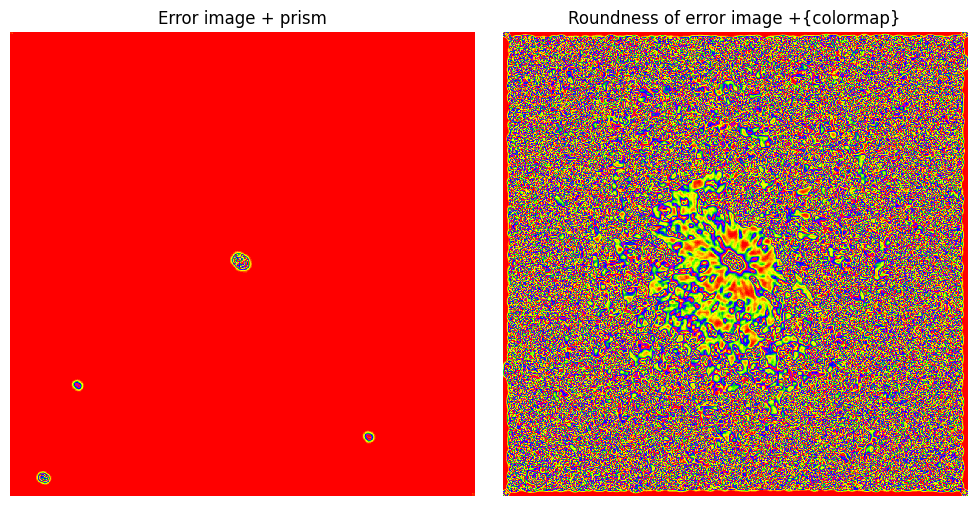

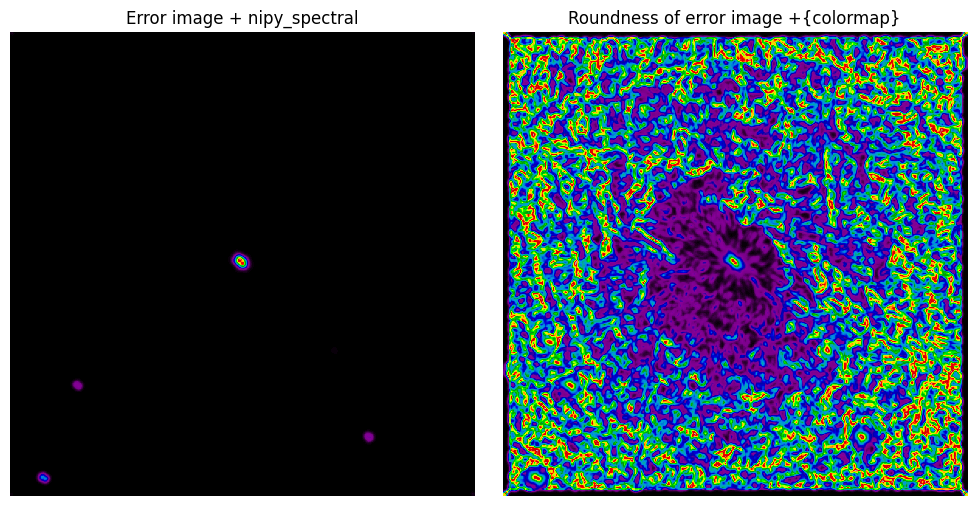

In [52]:
for colormap in SPECTRAL_LIST:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

    # First plot
    axes[0].imshow(feature_output[0], cmap=colormap,origin='lower')
    axes[0].axis('off')  
    axes[0].set_title(f'Error image + {colormap}')
    
    # Second plot
    axes[1].imshow(feature_output[1], cmap=colormap,origin='lower')
    axes[1].axis('off')
    axes[1].set_title('Roundness of error image +{colormap}')
    
    plt.tight_layout()  
    plt.show()
        
